## Interpolation

In [2]:
from scipy import interpolate
from numpy import polynomial as P
import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt

### Polynomials

계수를 이용해 다항식을 정의하는 방법

In [3]:
p1 = P.Polynomial([1,2,3])
p1

Polynomial([1., 2., 3.], domain=[-1,  1], window=[-1,  1])

In [5]:
print(p1)

1.0 + 2.0 x**1 + 3.0 x**2


In [6]:
repr(p1)

'Polynomial([1., 2., 3.], domain=[-1,  1], window=[-1,  1])'

근을 이용해 다항식을 정의하는 방법

In [7]:
p2 = P.Polynomial.fromroots([-1, 1])
p2

Polynomial([-1.,  0.,  1.], domain=[-1.,  1.], window=[-1.,  1.])

In [8]:
print(p2)

-1.0 + 0.0 x**1 + 1.0 x**2


In [9]:
repr(p2)

'Polynomial([-1.,  0.,  1.], domain=[-1.,  1.], window=[-1.,  1.])'

다항식의 해는 ```roots``` method를 이용해 계산할 수 있다.

In [10]:
p1.roots()

array([-0.33333333-0.47140452j, -0.33333333+0.47140452j])

In [11]:
p2.roots()

array([-1.,  1.])

In [12]:
p1.coef

array([1., 2., 3.])

In [13]:
p1.domain

array([-1,  1])

In [14]:
p1.window

array([-1,  1])

다항식의 $x$에 값을 대입하여 계산하기

In [15]:
p1(np.array([1.5, 2.5, 3.5]))

array([10.75, 24.75, 44.75])

```Polynomial``` 객체는 기본적인 산술 연산을 적용할 수 있다. 

In [16]:
p1 + p2

Polynomial([0., 2., 4.], domain=[-1.,  1.], window=[-1.,  1.])

In [17]:
p2 / 5

Polynomial([-0.2,  0. ,  0.2], domain=[-1.,  1.], window=[-1.,  1.])

In [18]:
p1 = P.Polynomial.fromroots([1, 2, 3])

In [19]:
p1

Polynomial([-6., 11., -6.,  1.], domain=[-1.,  1.], window=[-1.,  1.])

In [20]:
p2 = P.Polynomial.fromroots([2])

In [21]:
p3 = p1 // p2

In [22]:
p3

Polynomial([ 3., -4.,  1.], domain=[-1.,  1.], window=[-1.,  1.])

In [23]:
p3.roots()

array([1., 3.])

기본 다항식 외에도 다른 base를 바탕으로 하는 다항식들이 구현되어 있다.

In [31]:
c1 = P.Chebyshev([1, 2, 3])
c1

Chebyshev([1., 2., 3.], domain=[-1,  1], window=[-1,  1])

In [32]:
c1.roots()

array([-0.76759188,  0.43425855])

In [34]:
c = P.Chebyshev.fromroots([-1, 1])
c

Chebyshev([-0.5,  0. ,  0.5], domain=[-1.,  1.], window=[-1.,  1.])

In [36]:
l = P.Legendre.fromroots([-1, 1])
l

Legendre([-0.66666667,  0.        ,  0.66666667], domain=[-1.,  1.], window=[-1.,  1.])

In [37]:
c(np.array([0.5, 1.5, 2.5]))

array([-0.75,  1.25,  5.25])

In [38]:
l(np.array([0.5, 1.5, 2.5]))

array([-0.75,  1.25,  5.25])

### Polynomial interpolation

In [39]:
x = np.array([1, 2, 3, 4])
y = np.array([1, 3, 5, 4])

In [40]:
deg = len(x) - 1

In [44]:
A = P.polynomial.polyvander(x, deg)
A

array([[ 1.,  1.,  1.,  1.],
       [ 1.,  2.,  4.,  8.],
       [ 1.,  3.,  9., 27.],
       [ 1.,  4., 16., 64.]])

In [43]:
c = linalg.solve(A, y)
c

array([ 2. , -3.5,  3. , -0.5])

In [48]:
f1 = P.Polynomial(c)
f1

Polynomial([ 2. , -3.5,  3. , -0.5], domain=[-1,  1], window=[-1,  1])

In [47]:
f1(x)

array([1., 3., 5., 4.])

In [46]:
f1(2.5)

4.1875

Chevyshev 다항식을 이용한 interpolation

In [49]:
A = P.chebyshev.chebvander(x, deg)
A

array([[  1.,   1.,   1.,   1.],
       [  1.,   2.,   7.,  26.],
       [  1.,   3.,  17.,  99.],
       [  1.,   4.,  31., 244.]])

In [50]:
c = linalg.solve(A, y)
c

array([ 3.5  , -3.875,  1.5  , -0.125])

In [52]:
f2 = P.Chebyshev(c)
f2

Chebyshev([ 3.5  , -3.875,  1.5  , -0.125], domain=[-1,  1], window=[-1,  1])

In [53]:
f2(x)

array([1., 3., 5., 4.])

In [54]:
f2(2.5)

4.1875

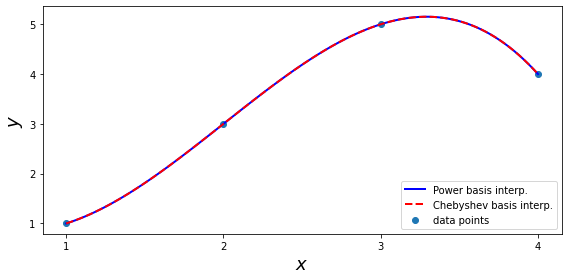

In [55]:
xx = np.linspace(x.min(), x.max(), 100)

fig, ax = plt.subplots(1, 1, figsize=(8, 4))

ax.plot(xx, f1(xx), 'b', lw=2, label='Power basis interp.')
ax.plot(xx, f2(xx), 'r--', lw=2, label='Chebyshev basis interp.')
ax.scatter(x, y, label='data points')

ax.legend(loc=4)
ax.set_xticks(x)
ax.set_ylabel(r"$y$", fontsize=18)
ax.set_xlabel(r"$x$", fontsize=18)

fig.tight_layout()

```fit``` mnethod를 이용하면 더욱 간편하다.

In [56]:
f1b = P.Polynomial.fit(x, y, deg)
f1b

Polynomial([ 4.1875,  3.1875, -1.6875, -1.6875], domain=[1., 4.], window=[-1.,  1.])

In [57]:
f2b = P.Chebyshev.fit(x, y, deg)
f2b

Chebyshev([ 3.34375 ,  1.921875, -0.84375 , -0.421875], domain=[1., 4.], window=[-1.,  1.])

In [58]:
np.linalg.cond(P.chebyshev.chebvander(x, deg))

4659.738424139918

In [59]:
np.linalg.cond(P.chebyshev.chebvander((2*x-5)/3.0, deg))

1.8542033440472891

In [60]:
(2 * x - 5)/3.0

array([-1.        , -0.33333333,  0.33333333,  1.        ])

In [61]:
f1 = P.Polynomial.fit(x, y, 1)
f2 = P.Polynomial.fit(x, y, 2)
f3 = P.Polynomial.fit(x, y, 3)

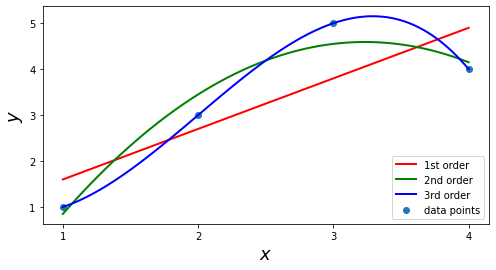

In [62]:
xx = np.linspace(x.min(), x.max(), 100)

fig, ax = plt.subplots(1, 1, figsize=(8, 4))

ax.plot(xx, f1(xx), 'r', lw=2, label='1st order')
ax.plot(xx, f2(xx), 'g', lw=2, label='2nd order')
ax.plot(xx, f3(xx), 'b', lw=2, label='3rd order')
ax.scatter(x, y, label='data points')

ax.legend(loc=4)
ax.set_xticks(x)
ax.set_ylabel(r"$y$", fontsize=18)
ax.set_xlabel(r"$x$", fontsize=18);

### Runge problem

In [63]:
def runge(x):
    return 1/(1 + 25 * x**2)

In [64]:
def runge_interpolate(n):
    x = np.linspace(-1, 1, n+1)
    p = P.Polynomial.fit(x, runge(x), deg=n)
    return x, p

In [65]:
xx = np.linspace(-1, 1, 250)

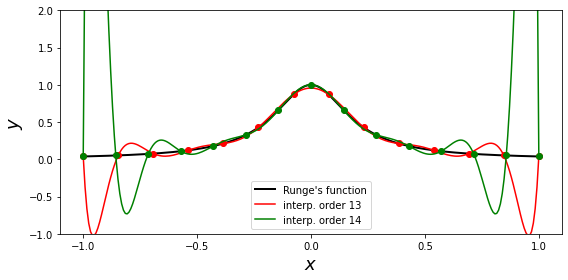

In [66]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))

ax.plot(xx, runge(xx), 'k', lw=2, label="Runge's function")

n = 13
x, p = runge_interpolate(n)
ax.plot(x, runge(x), 'ro')
ax.plot(xx, p(xx), 'r', label='interp. order %d' % n)

n = 14
x, p = runge_interpolate(n)
ax.plot(x, runge(x), 'go')
ax.plot(xx, p(xx), 'g', label='interp. order %d' % n)

ax.legend(loc=8)
ax.set_xlim(-1.1, 1.1)
ax.set_ylim(-1, 2)
ax.set_xticks([-1, -0.5, 0, 0.5, 1])
ax.set_ylabel(r"$y$", fontsize=18)
ax.set_xlabel(r"$x$", fontsize=18)

fig.tight_layout()

### Spline interpolation

Spline은 일종의 piecewise polynomial interpolation이라고 볼 수 있다.  
Scipy의 ```interpolate``` 모듈은 spline interpolation을 위한 함수와 클래스들을 제공한다. 
대표적으로 ```interpolate.interp1d``` 함수는 $x$와 $y$를 인자로 받아, spline interpolation을 진행한다.  
```interpolate.interp1d```의 ```kind``` 인자는 다항식의 차수를 지정한다.   

In [69]:
x = np.linspace(-1, 1, 11)
y = runge(x)
f = interpolate.interp1d(x, y, kind=3)
f

In [72]:
f(0.5)

array(0.03846154)

In [73]:
f([0.2, 0.3])

array([0.5       , 0.29733288])

In [74]:
xx = np.linspace(-1, 1, 100)

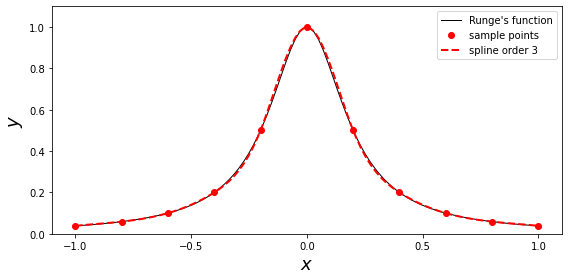

In [75]:
fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(xx, runge(xx), 'k', lw=1, label="Runge's function")
ax.plot(x, y, 'ro', label='sample points')
ax.plot(xx, f(xx), 'r--', lw=2, label='spline order 3')

ax.legend()
ax.set_ylim(0, 1.1)
ax.set_xticks([-1, -0.5, 0, 0.5, 1])
ax.set_ylabel(r"$y$", fontsize=18)
ax.set_xlabel(r"$x$", fontsize=18)

fig.tight_layout()

In [76]:
x = np.array([0, 1, 2, 3, 4, 5, 6, 7])
y = np.array([3, 4, 3.5, 2, 1, 1.5, 1.25, 0.9])
xx = np.linspace(x.min(), x.max(), 100)

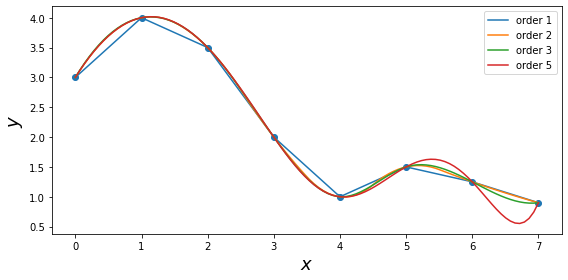

In [77]:
fig, ax = plt.subplots(figsize=(8, 4))

ax.scatter(x, y)

for n in [1, 2, 3, 5]:
    f = interpolate.interp1d(x, y, kind=n)
    ax.plot(xx, f(xx), label='order %d' % n)

ax.legend()
ax.set_ylabel(r"$y$", fontsize=18)
ax.set_xlabel(r"$x$", fontsize=18)

fig.tight_layout()

### Multivariate interpolation

단일 변수 interpolation은 다변수 interpolation으로 확장할 수 있다.  
이변수 interpolation으로 ```interpolate.interp2d```와 ```interpolate.griddata``` 함수가 이용된다.  

In [78]:
x = y = np.linspace(-2, 2, 10)

In [79]:
def f(x, y):
    return np.exp(-(x + .5)**2 - 2*(y + .5)**2) - np.exp(-(x - .5)**2 - 2*(y - .5)**2)

In [89]:
X, Y = np.meshgrid(x, y)
Z = f(X, Y) + 0.05 * np.random.randn(*X.shape)  # * is used for unpacking
Z

array([[ 0.06447029,  0.03232772, -0.0075224 , -0.01969023,  0.08212215,
         0.01277993, -0.00402025, -0.01422242,  0.07679294, -0.06866256],
       [-0.09367635, -0.03502405,  0.07767288,  0.14469066,  0.00970153,
         0.13727443,  0.03428883,  0.0621272 ,  0.07335237,  0.01497764],
       [ 0.07313464,  0.16413158,  0.32706109,  0.45249042,  0.42466647,
         0.2290117 ,  0.18105419, -0.03912289,  0.02847114, -0.04904628],
       [ 0.07134224,  0.31875004,  0.62403508,  0.83357174,  0.82097416,
         0.48352394,  0.15025092,  0.05506492,  0.03537018, -0.06890103],
       [ 0.12368519,  0.2340966 ,  0.52984748,  0.78095325,  0.54237416,
         0.14088412, -0.19321276, -0.19089601, -0.14378315,  0.08120441],
       [ 0.06954364,  0.10088638,  0.1938389 ,  0.12421047, -0.22524078,
        -0.62209884, -0.74719002, -0.59674971, -0.30941332, -0.10083904],
       [ 0.00668333,  0.0630967 , -0.10126512, -0.10500188, -0.47782187,
        -0.81245105, -0.88253497, -0.6375367 

In [86]:
f_interp = interpolate.interp2d(x, y, Z, kind='cubic')

In [93]:
f_interp(0.11, 0.2)

array([-0.44461773])

In [95]:
xx = yy = np.linspace(x.min(), x.max(), 100)
XX, YY = np.meshgrid(xx, yy)

ZZi = f_interp(xx, yy)
ZZi

array([[ 0.0564973 ,  0.05852455,  0.05945529, ...,  0.00077608,
        -0.00698511, -0.01593404],
       [ 0.02819708,  0.04302204,  0.05458429, ...,  0.02903828,
         0.01426829, -0.00334324],
       [ 0.00458946,  0.02947649,  0.04941496, ...,  0.05046422,
         0.03030901,  0.00607812],
       ...,
       [ 0.02280515,  0.02973755,  0.03521111, ...,  0.01877285,
         0.04254176,  0.07057432],
       [ 0.03309054,  0.03106352,  0.02884814, ...,  0.0162719 ,
         0.03799979,  0.06396484],
       [ 0.04503292,  0.03238616,  0.02106064, ...,  0.01277825,
         0.03140725,  0.05412785]])

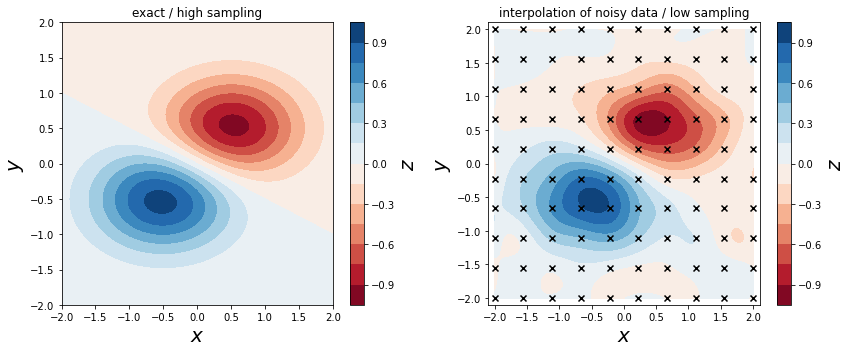

In [96]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

c = axes[0].contourf(XX, YY, f(XX, YY), 15, cmap=plt.cm.RdBu)
axes[0].set_xlabel(r"$x$", fontsize=20)
axes[0].set_ylabel(r"$y$", fontsize=20)
axes[0].set_title("exact / high sampling")
cb = fig.colorbar(c, ax=axes[0])
cb.set_label(r"$z$", fontsize=20)

c = axes[1].contourf(XX, YY, ZZi, 15, cmap=plt.cm.RdBu)
axes[1].set_ylim(-2.1, 2.1)
axes[1].set_xlim(-2.1, 2.1)
axes[1].set_xlabel(r"$x$", fontsize=20)
axes[1].set_ylabel(r"$y$", fontsize=20)
axes[1].scatter(X, Y, marker='x', color='k')
axes[1].set_title("interpolation of noisy data / low sampling")
cb = fig.colorbar(c, ax=axes[1])
cb.set_label(r"$z$", fontsize=20)

fig.tight_layout()

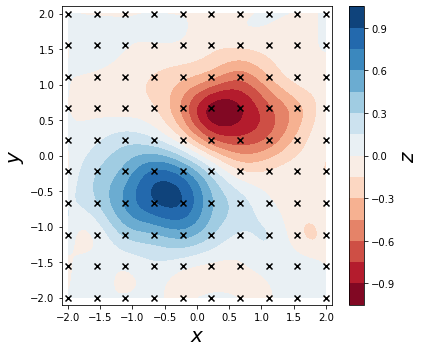

In [97]:
fig, ax = plt.subplots(1, 1, figsize=(6, 5))

c = ax.contourf(XX, YY, ZZi, 15, cmap=plt.cm.RdBu)
ax.set_ylim(-2.1, 2.1)
ax.set_xlim(-2.1, 2.1)
ax.set_xlabel(r"$x$", fontsize=20)
ax.set_ylabel(r"$y$", fontsize=20)
ax.scatter(X, Y, marker='x', color='k')
cb = fig.colorbar(c, ax=ax)
cb.set_label(r"$z$", fontsize=20)

fig.tight_layout()

### Irregular grid

Sample된 데이터가 irregular한 grid에서 얻어졌을 경우, 이를 regular한 grid 상으로 변환하여 살펴볼 필요가 있다.  
이 때 활용될 수 있는 함수가 ```interpolate.griddata```이다.  

In [98]:
x = y = np.linspace(-1, 1, 100)
X, Y = np.meshgrid(x, y)
def f(x, y):
    return np.exp(-x**2 - y**2) * np.cos(4*x) * np.sin(6*y)
Z = f(X, Y)

In [99]:
N = 500
xdata = np.random.uniform(-1, 1, N)
ydata = np.random.uniform(-1, 1, N)
zdata = f(xdata, ydata)

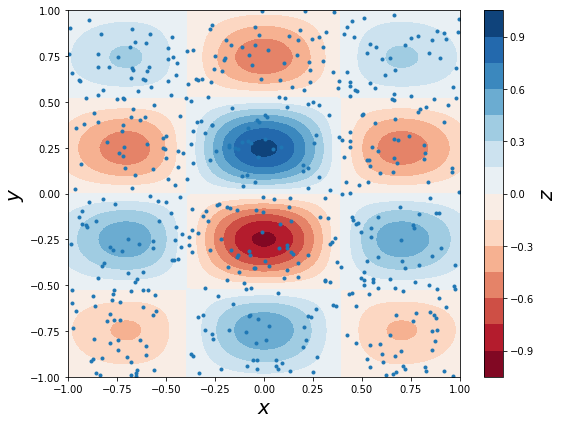

In [100]:
fig, ax = plt.subplots(figsize=(8, 6))
c = ax.contourf(X, Y, Z, 15, cmap=plt.cm.RdBu);
ax.scatter(xdata, ydata, marker='.')
ax.set_ylim(-1,1)
ax.set_xlim(-1,1)
ax.set_xlabel(r"$x$", fontsize=20)
ax.set_ylabel(r"$y$", fontsize=20)

cb = fig.colorbar(c, ax=ax)
cb.set_label(r"$z$", fontsize=20)

fig.tight_layout()

In [102]:
def z_interpolate(xdata, ydata, zdata):
    Zi_0 = interpolate.griddata((xdata, ydata), zdata, (X, Y), method='nearest')
    Zi_1 = interpolate.griddata((xdata, ydata), zdata, (X, Y), method='linear')
    Zi_3 = interpolate.griddata((xdata, ydata), zdata, (X, Y), method='cubic')
    return Zi_0, Zi_1, Zi_3

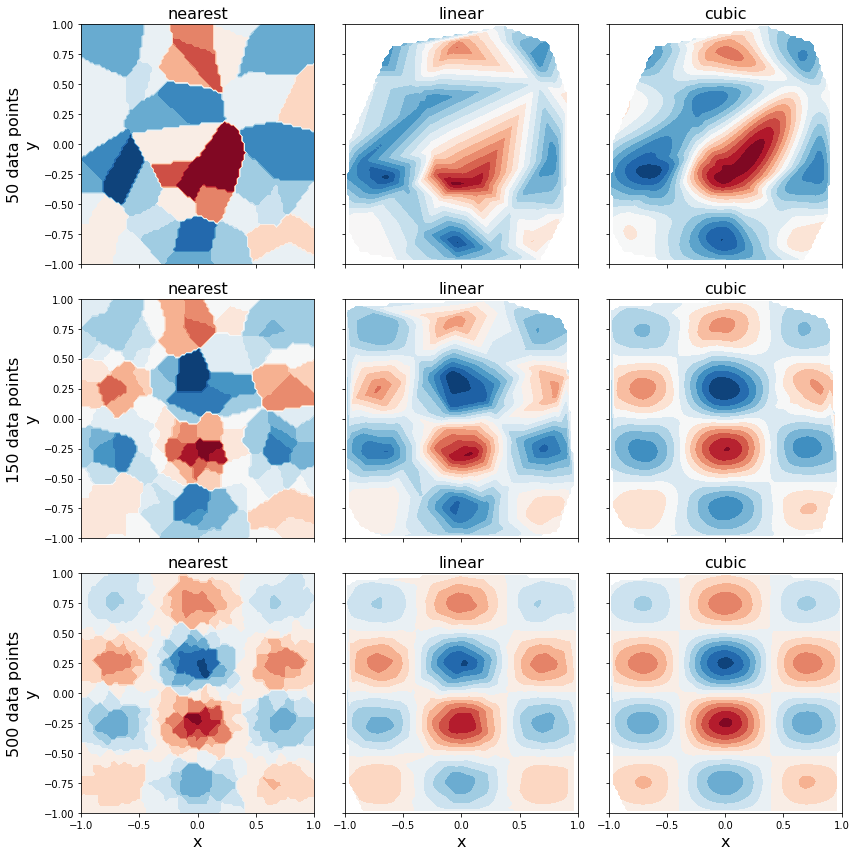

In [103]:
fig, axes = plt.subplots(3, 3, figsize=(12, 12), sharex=True, sharey=True)

n_vec = [50, 150, 500]

for idx, n in enumerate(n_vec):
    Zi_0, Zi_1, Zi_3 = z_interpolate(xdata[:n], ydata[:n], zdata[:n])
    axes[idx, 0].contourf(X, Y, Zi_0, 15, cmap=plt.cm.RdBu)
    axes[idx, 0].set_ylabel("%d data points\ny" % n, fontsize=16)
    axes[idx, 0].set_title("nearest", fontsize=16)
    axes[idx, 1].contourf(X, Y, Zi_1, 15, cmap=plt.cm.RdBu)
    axes[idx, 1].set_title("linear", fontsize=16)
    axes[idx, 2].contourf(X, Y, Zi_3, 15, cmap=plt.cm.RdBu)
    axes[idx, 2].set_title("cubic", fontsize=16)

for m in range(len(n_vec)):
    axes[idx, m].set_xlabel("x", fontsize=16)
    
fig.tight_layout()